# Store Sales Analysis Project
This project analyzes the sales performance of our stores using the processed dataset loaded into MySQL.  
Key insights include revenue trends, top customers, product sales, and store performance.

In [1]:
!pip install mysql-connector-python sqlalchemy

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd

In [3]:
from sqlalchemy import create_engine

# Connection details
username = 'root'
password = '***'  # encoded password
host = 'localhost'
database = 'processed_store_db'  
# Create engine
engine = create_engine(f'mysql+mysqlconnector://{username}:{password}@{host}/{database}')

# Test connection
connection = engine.connect()
print("Connection successful!")

# Close connection
connection.close()


Connection successful!


In [4]:
df = pd.read_csv('cleaned_superstore_data.csv')

In [5]:
# Upload dataframe to SQL 
df.to_sql(name='processed_store', con=engine, if_exists='replace', index=False)

print("Data uploaded to MySQL successfully!")

Data uploaded to MySQL successfully!


In [6]:
query = "SELECT * FROM processed_store LIMIT 5;"
result = pd.read_sql(query, con=engine)
result

,Category,City,Country,Customer.ID,Customer.Name,Discount,Market,Record.Count,Order.Date,Order.ID,...,Ship.Mode,Shipping.Cost,State,Sub.Category,Year,Market2,weeknum,Order_Year,Order_Month,Order_Weekday
0,Office Supplies,Los Angeles,United States,LS-172304,Lycoris Saunders,0.0,US,1,2011-01-07,CA-2011-130813,...,Second Class,4.37,California,Paper,2011,North America,2,2011,1,4
1,Office Supplies,Los Angeles,United States,MV-174854,Mark Van Huff,0.0,US,1,2011-01-21,CA-2011-148614,...,Standard Class,0.94,California,Paper,2011,North America,4,2011,1,4
2,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.0,US,1,2011-08-05,CA-2011-118962,...,Standard Class,1.81,California,Paper,2011,North America,32,2011,8,4
3,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.0,US,1,2011-08-05,CA-2011-118962,...,Standard Class,4.59,California,Paper,2011,North America,32,2011,8,4
4,Office Supplies,Los Angeles,United States,AP-109154,Arthur Prichep,0.0,US,1,2011-09-29,CA-2011-146969,...,Standard Class,1.32,California,Paper,2011,North America,40,2011,9,3


### Business Questions and SQL Queries

#### What is the total revenue generated?

In [7]:
query = 'DESCRIBE processed_store'
result = pd.read_sql(query, con=engine)
result

,Field,Type,Null,Key,Default,Extra
0,Category,text,YES,,None,
1,City,text,YES,,None,
2,Country,text,YES,,None,
3,Customer.ID,text,YES,,None,
4,Customer.Name,text,YES,,None,
5,Discount,double,YES,,None,
6,Market,text,YES,,None,
7,Record.Count,bigint,YES,,None,
8,Order.Date,text,YES,,None,
9,Order.ID,text,YES,,None,


In [53]:
query = "SELECT SUM(Sales) AS Total_Revenue FROM processed_store;"
total_revenue = pd.read_sql(query, con=engine)
total_revenue

,Total_Revenue
0,12642905.0


#### What is the total quantity of products sold? 

In [9]:
query = "SELECT SUM(Quantity) AS Total_Quantity FROM processed_store; "
result = pd.read_sql(query, con=engine)
result

,Total_Quantity
0,178312.0


#### What is the average order value per customer? 

In [10]:
query = 'SHOW COLUMNS FROM processed_store;'
result = pd.read_sql(query, con=engine)
result

,Field,Type,Null,Key,Default,Extra
0,Category,text,YES,,None,
1,City,text,YES,,None,
2,Country,text,YES,,None,
3,Customer.ID,text,YES,,None,
4,Customer.Name,text,YES,,None,
5,Discount,double,YES,,None,
6,Market,text,YES,,None,
7,Record.Count,bigint,YES,,None,
8,Order.Date,text,YES,,None,
9,Order.ID,text,YES,,None,


In [11]:
query = """
SELECT 
    `Customer.ID`, 
    AVG(Total_Sales) AS Avg_Total_Value_Per_Customer
FROM (
    SELECT 
        `Customer.ID`, 
        SUM(Sales) AS Total_Sales
    FROM processed_store
    GROUP BY `Customer.ID`
) AS Customer_Sales
GROUP BY `Customer.ID`
ORDER BY Avg_Total_Value_Per_Customer DESC
LIMIT 10;
"""

pd.read_sql(query, con=engine)


,Customer.ID,Avg_Total_Value_Per_Customer
0,SM-203204,25042.0
1,TC-209804,19050.0
2,CS-118451,16655.0
3,SP-209202,16566.0
4,VG-218051,15654.0
5,RB-193604,15117.0
6,PF-191201,15063.0
7,TA-213854,14596.0
8,BF-110051,14563.0
9,AB-101054,14476.0


#### Which product category has the highest sales revenue? 

In [12]:
query = """
SELECT Category, SUM(Sales) AS Total_Sales_By_Category
FROM processed_store
GROUP BY Category
ORDER BY Total_Sales_By_Category DESC;
"""
pd.read_sql(query, con=engine)


,Category,Total_Sales_By_Category
0,Technology,4744691.0
1,Furniture,4110884.0
2,Office Supplies,3787330.0


#### Which product is sold the most by quantity?

In [13]:
query = """
SELECT `Product.Name`, SUM(Quantity) AS Total_Quantity_Sold
FROM processed_store
GROUP BY `Product.Name`
ORDER BY Total_Quantity_Sold DESC
LIMIT 1;
"""
pd.read_sql(query, con=engine)


,Product.Name,Total_Quantity_Sold
0,Staples,876.0


#### Which month had the highest sales?

In [14]:
query = '''
SELECT Order_Month, SUM(Sales) AS Total_Sales
FROM processed_store
GROUP BY Order_Month
ORDER BY Total_Sales DESC
LIMIT 1;
'''
pd.read_sql(query, con=engine)


,Order_Month,Total_Sales
0,12,1580816.0


#### What is the sales trend by month? 

In [15]:
query = '''
SELECT Order_Month, SUM(Sales) AS Total_Sales
FROM processed_store
GROUP BY Order_Month
ORDER BY Order_Month ASC
;
'''
pd.read_sql(query, con=engine)

,Order_Month,Total_Sales
0,1,675141.0
1,2,543768.0
2,3,770519.0
3,4,698603.0
4,5,904061.0
5,6,1269751.0
6,7,749423.0
7,8,1293852.0
8,9,1437432.0
9,10,1168220.0


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

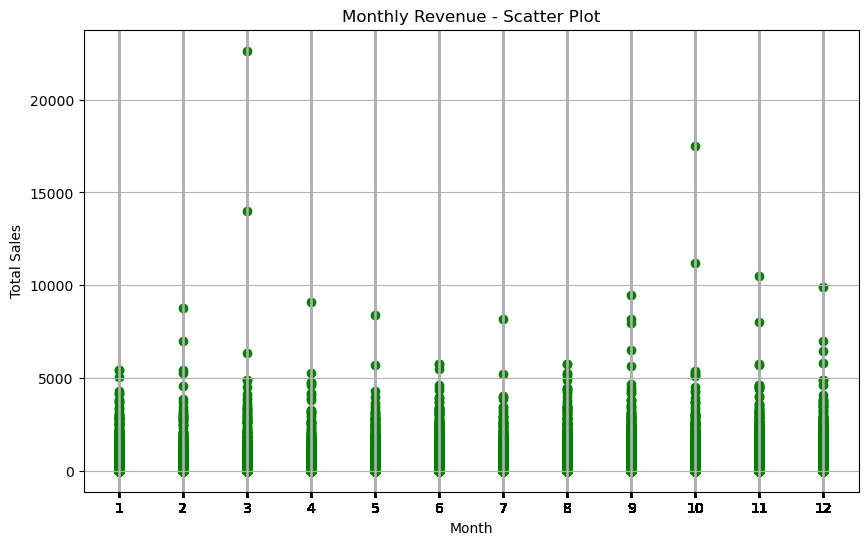

In [17]:
plt.figure(figsize=(10,6))
plt.scatter(df['Order_Month'], df['Sales'], color='green')
plt.title('Monthly Revenue - Scatter Plot')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.xticks(df['Order_Month'])
plt.show()

#### Which Country generated the highest Sales?

In [20]:
query = """
SELECT Country , SUM(Sales) AS Total_Sales
FROM processed_store
GROUP BY Country
ORDER BY Total_Sales DESC
LIMIT 1;
"""
pd.read_sql(query, con=engine)

,Country,Total_Sales
0,United States,2297354.0


#### Which city generated the highest Sales?

In [21]:
query = """
SELECT City , SUM(Sales) AS Total_Sales
FROM processed_store
GROUP BY City
ORDER BY Total_Sales DESC
LIMIT 1;
"""
pd.read_sql(query, con=engine)

,City,Total_Sales
0,New York City,256397.0


#### Which region generated the highest sales?

In [30]:
query = """
SELECT Region , SUM(Sales) AS Total_Sales
FROM processed_store
GROUP BY Region
ORDER BY Total_Sales DESC
LIMIT 1;
"""
pd.read_sql(query, con=engine)

,Region,Total_Sales
0,Central,2822399.0


#### Which state generated the highest sales?

In [25]:
query = """
SELECT State , SUM(Sales) AS Total_Sales
FROM processed_store
GROUP BY State
ORDER BY Total_Sales DESC
LIMIT 1;
"""
pd.read_sql(query, con=engine)

,State,Total_Sales
0,England,485166.0


In [27]:
query = '''
SELECT Country, State, SUM(Sales) AS Total_Sales
FROM processed_store
GROUP BY Country, State
ORDER BY Total_Sales DESC
LIMIT 5;
'''
pd.read_sql(query, con=engine)

,Country,State,Total_Sales
0,United Kingdom,England,485166.0
1,United States,California,457731.0
2,France,Ile-de-France,317818.0
3,United States,New York,310914.0
4,Australia,New South Wales,270509.0


##### Key Insight:
The United States leads in overall sales when considering the country alone. However, the state of England stands out as the top-performing state. When grouping by both Country and State, United Kingdom (England) holds the highest sales overall.

#### Top 5 customers based on total spending

In [38]:
query = """
SELECT `Customer.ID`, `Customer.Name`, SUM(Sales) AS Total_Spending
FROM processed_store
GROUP BY `Customer.ID`, `Customer.Name`
ORDER BY Total_Spending DESC
LIMIT 5;
"""
top_customers = pd.read_sql(query, con=engine)
top_customers

,Customer.ID,Customer.Name,Total_Spending
0,SM-203204,Sean Miller,25042.0
1,TC-209804,Tamara Chand,19050.0
2,CS-118451,Cari Sayre,16655.0
3,SP-209202,Susan Pistek,16566.0
4,VG-218051,Vivek Grady,15654.0


#### Which discount range generated the most revenue?

In [42]:
query = """SELECT 
  CASE
    WHEN Discount BETWEEN 0 AND 5 THEN '0-5%'
    WHEN Discount BETWEEN 5 AND 15 THEN '5-15%'
    WHEN Discount BETWEEN 15 AND 30 THEN '15-30%'
    WHEN Discount > 30 THEN '30%+'
    ELSE 'No Discount'
  END AS Discount_Range,
  SUM(Sales) AS Total_Revenue
FROM processed_store
GROUP BY Discount_Range
ORDER BY Total_Revenue DESC
LIMIT 1;
"""
Discount_Range = pd.read_sql(query, con=engine)
Discount_Range

,Discount_Range,Total_Revenue
0,0-5%,12642905.0


#### Which customers received the highest total discounts?


In [52]:
query = """
SELECT `Customer.ID`, `Customer.Name`, SUM(Discount) AS Total_Discount
FROM processed_store
GROUP BY `Customer.ID`, `Customer.Name`
ORDER BY Total_Discount DESC
LIMIT 5;
"""
Customer_Discount= pd.read_sql(query, con=engine)
Customer_Discount

,Customer.ID,Customer.Name,Total_Discount
0,AJ-7801,Anthony Jacobs,10.5
1,SC-103051,Sean Christensen,9.8
2,HD-147853,Harold Dahlen,9.3
3,TC-109801,Tamara Chand,9.1
4,KT-164653,Kean Takahito,8.6


#### How many different products were sold overall? 

In [50]:
query = """SELECT COUNT(DISTINCT `Product.Name`) AS Total_Unique_Products
FROM processed_store;"""
products = pd.read_sql(query, con=engine)
products

,Total_Unique_Products
0,3788


## Key Insights:

- **Total Revenue**: The business generated a strong total revenue **12642905.0**, indicating healthy overall sales performance.

- **Total Quantity Sold**: A significant volume of products was sold, reflecting steady customer demand.

- **Average Order Value**: The average spending per customer provides a useful benchmark for setting future sales goals and promotions.

- **Top-Selling Product Category**: The highest revenue came from a **Technology** category, suggesting where to focus marketing and inventory efforts.

- **Best-Selling Product by Quantity**: The most frequently sold product is **Staples** highlights customer preferences and key revenue drivers.

- **Best Sales Month**: **December** stood out with the highest sales, indicating potential seasonal trends or successful campaigns.

- **Monthly Revenue Trend**: The monthly sales trend showed patterns that can help in forecasting and strategic planning.

- **Top-Performing Location**: The United States leads in overall sales when considering the country alone. However, the state of England stands out as the top-performing state. When grouping by both Country and State, **United Kingdom (England)** holds the highest sales overall.

- **Top Customers**: The top 5 customers contributed significantly to the revenue, highlighting opportunities for loyalty programs and personalized engagement.

- **Most Profitable Discount Range**: Lower discount ranges (e.g., **0-5%**) generated the most revenue, showing that heavy discounts may not always be necessary.

- **Customers with Highest Discounts**: Customers like Anthony Jacobs, Sean Christensen received notable discounts, which can be evaluated for future discount policies.

- **Product Variety Sold**: A diverse range of products was sold overall, demonstrating a wide product appeal to customers.